In [1]:
import ml
reload(ml)
from ml import *
import json
import timeit
import numba
import scipy
import swifter
import operator
import itertools
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.ensemble import VotingClassifier
from __future__ import division
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

__author__ = 'HK Dambanemuya'
__version__ = 'Python 2'

'''
    Analysis originaly performed in Python 2 (deprecated)
    Seaborn, Statsmodel, and * imports broken in Python 3
'''

In [2]:
# Import features
with open("../Data/features.txt") as file:
    features = json.load(file)
# Initialize Standard Scaler
scaler = StandardScaler() 
# Initialize Feature Values
feature_values = {}
# Import Data
data = pd.read_csv("../Data/prosper_final.csv")

## Model Evaluation

## Lender Features

In [3]:
# lender_features = list(set(features.get("Lender")) - set(["LenderAvgBidWinningRate", "LenderAvgListingSuccessRate", 
#                                                           "LenderAvgRepaymentSuccessRate", 
#                                                           "LenderSumUnlikelyBid", "LenderSumUnlikelyBidAmount"]))
# , "LenderAvgRepaidListings", "LenderAvgCompletedListings",
#                   "LenderAvgWinningBids", "LenderAvgTotalListings", "LenderAvgTotalBids",
lender_features = features.get("Lender")
X = data[lender_features].fillna(0)
X = scaler.fit_transform(X)
y = data['RepaidOrNot']
print features.get("Lender")
evaluation = evaluation_summary(X,y)
feature_values["Lender Features"] = evaluation.query("Model == 'RF'")["AUC"].item()
evaluation

[u'LenderYieldRate', u'Gini', u'AvgInterBidTime', u'BidCount', u'TimeToFirstBid', u'TimeBetweenFirstLastBid', u'LenderExperience']
Completed QDA in 0.1375694 seconds
Completed CART in 1.3334511 seconds
Completed GNB in 0.0937693 seconds
Completed RF in 98.9434756 seconds
Completed LR in 0.4223356 seconds
Completed ADB in 7.3757928 seconds


,Model,Accuracy,Precision,Recall,F1,AUC
0,QDA,0.648,0.697,0.785,0.738,0.599
1,CART,0.591,0.677,0.672,0.675,0.562
2,GNB,0.654,0.699,0.794,0.744,0.604
3,RF,0.638,0.760,0.624,0.685,0.643
4,LR,0.566,0.842,0.386,0.529,0.631
5,ADB,0.671,0.709,0.813,0.757,0.620


In [4]:
frank_summary(X, y, lender_features)

Feature ranking completed in 49.2947294 seconds


,Feature,RFE Rank,RFE Support,RF Importance,x
0,LenderYieldRate,1,True,0.274,1
1,LenderExperience,1,True,0.137,7
2,TimeBetweenFirstLastBid,1,True,0.122,6
3,AvgInterBidTime,1,True,0.121,3
4,Gini,1,True,0.121,2
5,TimeToFirstBid,1,True,0.114,5
6,BidCount,1,True,0.111,4


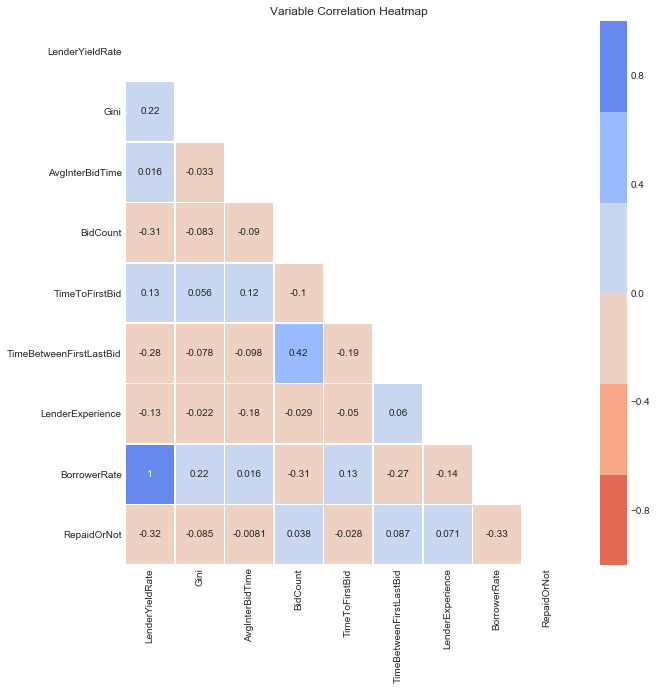

In [5]:
corr = data[lender_features+["BorrowerRate", "RepaidOrNot"]].fillna(0).corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.color_palette("coolwarm_r"),
        mask = mask,
        vmin = -1,
        vmax= 1,
        linewidths=.5,
        annot=True)
plt.title("Variable Correlation Heatmap")
plt.show()

## Borrower Features